<a href="https://colab.research.google.com/github/vivianesilviana/vivianesilviana/blob/main/Proyek_Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Decision Tree dengan Python
Python adalah bahasa pemrograman serba guna dan menawarkan paket dan alat pembelajaran mesin yang canggih kepada para ilmuwan data. Kami akan membuat model pohon Keputusan menggunakan paket pembelajaran mesin paling terkenal dari python, 'scikit-learn'. Kami akan membuat model menggunakan algoritme 'DecisionTreeClassifier' yang disediakan oleh scikit-learn, lalu visualisasikan model menggunakan fungsi 'plot_tree'.

##Langkah-1: Mengimpor paket packages
Packges yang terlibat dalam membangun model kami adalah panda, scikit-learn, dan NumPy. Ikuti kode untuk mengimpor paket yang diperlukan dengan python.

In [ ]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sns
from matplotlib import rcParams # figure size
from termcolor import colored as cl # text customization

from sklearn.tree import DecisionTreeClassifier as dtc # tree algorithm
from sklearn.model_selection import train_test_split # splitting the data
from sklearn.metrics import accuracy_score # model precision
from sklearn.tree import plot_tree # tree diagram

rcParams['figure.figsize'] = (25, 20)

Setelah mengimpor semua packages yang diperlukan untuk membuat model kita, sekarang saatnya mengimpor data dan melakukan beberapa EDA padanya.

##Langkah-2: Mengimport data dan EDA
Pada langkah ini, kita akan menggunakan packages 'Pandas' yang tersedia dalam python untuk diimpor dan melakukan beberapa EDA padanya. Kumpulan data yang akan kami gunakan untuk membangun model pohon keputusan kami adalah kumpulan data obat yang diresepkan untuk pasien berdasarkan kriteria tertentu. 


In [ ]:
#df = pd.read_csv('drug.csv')
#df.drop('Unnamed: 0', axis = 1, inplace = True)
#print(cl(df.head(), attrs = ['bold']))

df = pd.read_csv ('https://raw.githubusercontent.com/BerlinRKP/Classification/main/Telecust1.csv.xls')
df.head()


,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside,custcat
0,2,13,44,64,1,9,4,5,0,0,2,A
1,3,11,33,136,1,7,5,5,0,0,6,D
2,3,68,52,116,1,24,1,29,0,1,2,C
3,2,33,33,33,0,12,2,0,0,1,1,A
4,2,23,30,30,1,9,1,2,0,0,4,C


Keterangan
Region : Wilayah, Tenture : Masa Jabatan, Age : Umur, Income : Pendapatan, Marital : Pernikahan, Address : Alamat, ed : Jumlah permintaan, Employ : Karyawan, Retire : Mundur, Gender : Jenis kelamin, Reside : Bertempat tinggal, Custcat : Layanan pengumpulan data lengkap pelanggan


Setelah mengimpor data, mari kita dapatkan beberapa informasi dasar tentang data menggunakan fungsi 'info'. Informasi yang diberikan oleh fungsi ini mencakup jumlah entri, nomor indeks, nama kolom, jumlah nilai bukan nol, jenis atribut, dll.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   region   1000 non-null   int64 
 1   tenure   1000 non-null   int64 
 2   age      1000 non-null   int64 
 3   income   1000 non-null   int64 
 4   marital  1000 non-null   int64 
 5   address  1000 non-null   int64 
 6   ed       1000 non-null   int64 
 7   employ   1000 non-null   int64 
 8   retire   1000 non-null   int64 
 9   gender   1000 non-null   int64 
 10  reside   1000 non-null   int64 
 11  custcat  1000 non-null   object
dtypes: int64(11), object(1)
memory usage: 93.9+ KB


In [ ]:
df.isnull().sum

<bound method DataFrame.sum of      region  tenure    age  income  ...  retire  gender  reside  custcat
0     False   False  False   False  ...   False   False   False    False
1     False   False  False   False  ...   False   False   False    False
2     False   False  False   False  ...   False   False   False    False
3     False   False  False   False  ...   False   False   False    False
4     False   False  False   False  ...   False   False   False    False
..      ...     ...    ...     ...  ...     ...     ...     ...      ...
995   False   False  False   False  ...   False   False   False    False
996   False   False  False   False  ...   False   False   False    False
997   False   False  False   False  ...   False   False   False    False
998   False   False  False   False  ...   False   False   False    False
999   False   False  False   False  ...   False   False   False    False

[1000 rows x 12 columns]>

##Langkah-3: Memisahkan data
Setelah memproses data kita menjadi struktur yang tepat, kita sekarang siap untuk menentukan variabel 'X' atau variabel independen dan variabel 'Y' atau variabel dependen.

In [ ]:
X_var = df[['region', 'tenure', 'age', 'income', 'marital', 'address', 'ed', 'employ', 'retire', 'gender', 'reside']].values # independent variable
y_var = df['custcat'].values # dependent variable

print(cl('X variable samples : {}'.format(X_var[:5]), attrs = ['bold']))
print(cl('Y variable samples : {}'.format(y_var[:5]), attrs = ['bold']))

X variable samples : [[  2  13  44  64   1   9   4   5   0   0   2]
 [  3  11  33 136   1   7   5   5   0   0   6]
 [  3  68  52 116   1  24   1  29   0   1   2]
 [  2  33  33  33   0  12   2   0   0   1   1]
 [  2  23  30  30   1   9   1   2   0   0   4]]
Y variable samples : ['A' 'D' 'C' 'A' 'C']


Sekarang kita dapat membagi data menjadi satu set pelatihan dan set pengujian dengan variabel X dan Y yang telah ditentukan dengan menggunakan algoritme 'train_test_split' di scikit-learn. Ikuti kode untuk membagi data dengan python.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 0)

print(cl('X_train shape : {}'.format(X_train.shape), attrs = ['bold'], color = 'yellow'))
print(cl('X_test shape : {}'.format(X_test.shape), attrs = ['bold'], color = 'yellow'))
print(cl('y_train shape : {}'.format(y_train.shape), attrs = ['bold'], color = 'yellow'))
print(cl('y_test shape : {}'.format(y_test.shape), attrs = ['bold'], color = 'yellow'))


X_train shape : (800, 11)
X_test shape : (200, 11)
y_train shape : (800,)
y_test shape : (200,)


Sekarang kita memiliki semua komponen untuk membangun model pohon keputusan kita.

##Langkah-4: Membangun model & Prediksi
Membangun pohon keputusan dapat dilakukan dengan bantuan algoritme 'DecisionTreeClassifier' yang disediakan oleh paket scikit-learn. Setelah itu, kita bisa membuat prediksi data kita menggunakan model. Terakhir, ketepatan hasil prediksi kami dapat dihitung menggunakan metrik evaluasi 'akurasi_skor'.

In [ ]:
model = dtc(criterion = 'entropy', max_depth = 4)
model.fit(X_train, y_train)

pred_model = model.predict(X_test)

print(cl('Accuracy of the model is {:.0%}'.format(accuracy_score(y_test, pred_model)), attrs = ['bold']))

Accuracy of the model is 42%


Pada langkah pertama kode kami, kami mendefinisikan variabel yang disebut variabel 'model' di mana kami menyimpan model DecisionTreeClassifier. Selanjutnya, kami menyesuaikan dan melatih model menggunakan set pelatihan kami. Setelah itu, mendefinisikan variabel yang disebut variabel 'pred_model' di mana kami menyimpan semua nilai yang diprediksi oleh model kami pada data. Terakhir, kami menghitung ketepatan nilai prediksi kami ke nilai aktual yang menghasilkan akurasi 42%.

##Langkah-5: Memvisualisasikan model
Sekarang diperoleh model pohon keputusan dan memvisualisasikannya dengan memanfaatkan fungsi 'plot_tree' yang disediakan oleh paket scikit-learn di python. Ikuti kode untuk menghasilkan diagram pohon yang indah dari model pohon keputusan dengan python.

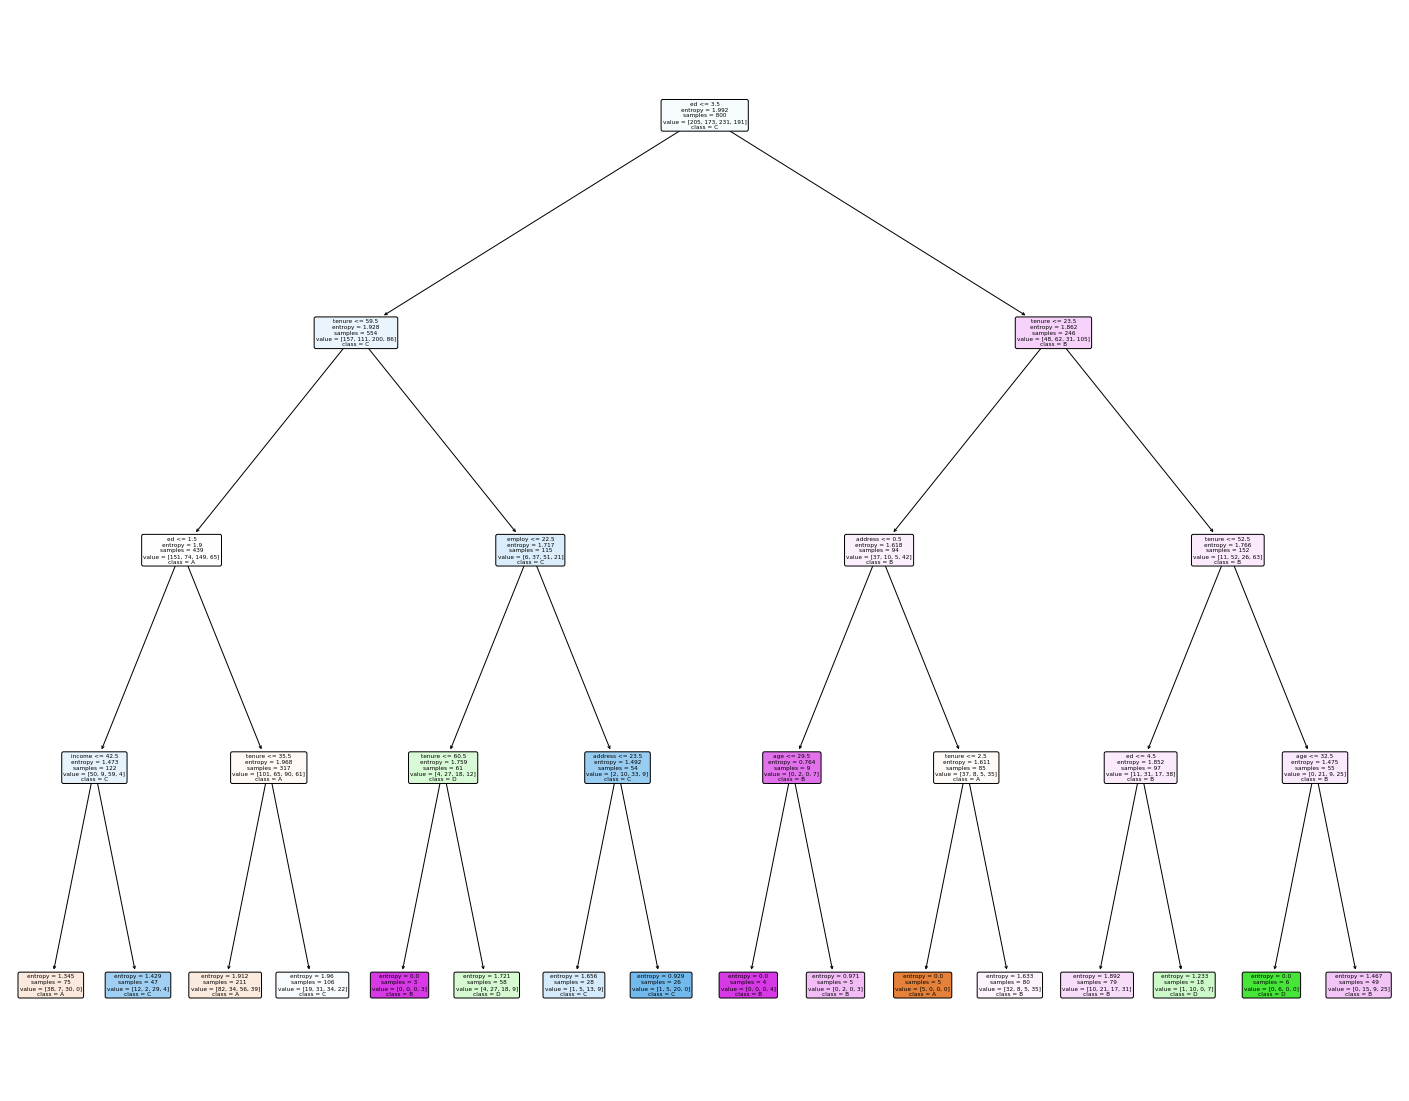

In [ ]:
feature_names = df.columns[:11]
target_names = df['custcat'].unique().tolist()

plot_tree(model, 
          feature_names = feature_names, 
          class_names = target_names, 
          filled = True, 
          rounded = True)

plt.savefig('tree_visualization.png') 

#Kesimpulan!
